# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-19 09:05:05.526689


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/18/20


,7/18/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,3711413,140119,3.78
Brazil,2074860,78772,3.80
United Kingdom,295632,45358,15.34
Mexico,338913,38888,11.47
Italy,244216,35042,14.35
France,211943,30155,14.23
Spain,260255,28420,10.92


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/18/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
30964,US,3576157,2020-07-16,138358.0,943.0,77255.0,65458.714286
30963,US,3498902,2020-07-15,137415.0,949.0,67328.0,63457.571429
30962,US,3431574,2020-07-14,136466.0,900.0,67417.0,62210.857143
30961,US,3364157,2020-07-13,135566.0,361.0,59215.0,61154.285714
30960,US,3304942,2020-07-12,135205.0,428.0,59017.0,59116.857143
30959,US,3245925,2020-07-11,134777.0,676.0,60188.0,57812.000000
30958,US,3185737,2020-07-10,134101.0,811.0,67791.0,55768.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/18/20


,7/18/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,406305,32478.0,7.99
New Jersey,176814,15699.0,8.88
Massachusetts,113238,8419.0,7.43
California,380745,7702.0,2.02
Illinois,161785,7483.0,4.63
Pennsylvania,104780,7015.0,6.69
Michigan,81338,6364.0,7.82


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/18/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1071,California,364706,2020-07-16,7489.0,114.0,9821.0,8888.857143
1070,California,354885,2020-07-15,7375.0,125.0,8674.0,8903.571429
1069,California,346211,2020-07-14,7250.0,161.0,12854.0,8885.571429
1068,California,333357,2020-07-13,7089.0,38.0,8814.0,8903.142857
1067,California,324543,2020-07-12,7051.0,24.0,5782.0,8551.714286
1066,California,318761,2020-07-11,7027.0,72.0,7876.0,9409.428571
1065,California,310885,2020-07-10,6955.0,96.0,8401.0,8624.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' COVID-19 cases by county as of', mostrecentdatecases)
casessummary



Number of confirmed California COVID-19 cases by county as of 7/18/20


,7/18/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,153152,4084.0,2.67
Riverside,28695,587.0,2.05
Orange,29011,494.0,1.70
San Diego,23114,478.0,2.07
San Bernardino,23566,328.0,1.39
Santa Clara,7300,177.0,2.42
Tulare,6683,165.0,2.47


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/18/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3398,Los Angeles,147678,2020-07-16,3989.0,46.0,4471.0,3240.857143
3397,Los Angeles,143207,2020-07-15,3943.0,46.0,2631.0,2850.142857
3396,Los Angeles,140576,2020-07-14,3897.0,73.0,4219.0,2830.285714
3395,Los Angeles,136357,2020-07-13,3824.0,15.0,2808.0,2826.714286
3394,Los Angeles,133549,2020-07-12,3809.0,14.0,3155.0,2646.428571
3393,Los Angeles,130394,2020-07-11,3795.0,51.0,2955.0,3224.000000
3392,Los Angeles,127439,2020-07-10,3744.0,54.0,2447.0,2804.714286
3391,Los Angeles,124992,2020-07-09,3690.0,47.0,1736.0,2457.142857
3390,Los Angeles,123256,2020-07-08,3643.0,61.0,2492.0,2513.000000
3389,Los Angeles,120764,2020-07-07,3582.0,48.0,4194.0,2416.285714



7 day new US cases as of 7/18/20


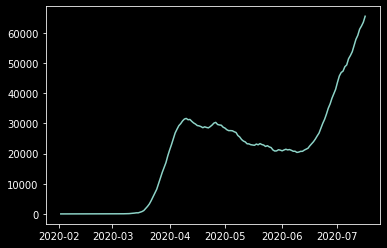

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/18/20


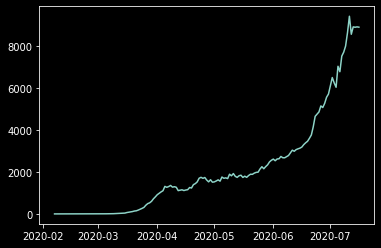

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/18/20


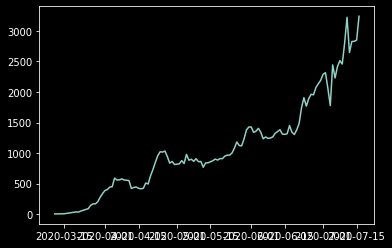

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countyDataTA["Rolling7Average"])

plt.show()